In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

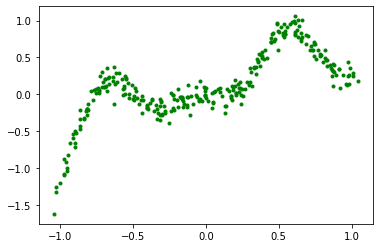

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [3]:
# ## Binary labeled data

# x = np.linspace(0,1,300)
# y= np.where(x<0.25, -0.5, 1)

# noise = np.random.normal(0,0.02, x.shape)

# x = x + noise
# noise = np.random.normal(0,0.1, x.shape)
# y = y + noise

# indx = np.argsort(x)
# x = x[indx]
# y = y[indx]

# x = x*2
# x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)

# %matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
# plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [18]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [19]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(dy*err_scaler)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])
    
    dy = yout - yy
    
    if epoch%10 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.21263926243562917


10 Error =  0.1679427368452577


20 Error =  0.14721601613429436


30 Error =  0.14264367162584074


40 Error =  0.14185963074129923


50 Error =  0.1390792285692158


60 Error =  0.13398533382886907


70 Error =  0.1313349158053879


80 Error =  0.12715126454373182


90 Error =  0.12426144208694204


100 Error =  0.12279378692657081


110 Error =  0.1213834656131166


120 Error =  0.12136095343422786


130 Error =  0.1203178062539213


140 Error =  0.11818029294675236


150 Error =  0.11837550190652806


160 Error =  0.11756975521174608


170 Error =  0.1174767168212044


180 Error =  0.11541314456523809


190 Error =  0.11537319495390454


200 Error =  0.11536573026375847


210 Error =  0.11448034026086869


220 Error =  0.11447563656520406


230 Error =  0.1144741922949304


240 Error =  0.11447436449841075


250 Error =  0.11447420192101836


260 Error =  0.11358331062042275


270 Error =  0.11357964494402556


280 Error =  0.11357935465593291


290

TclError: invalid command name "pyimage124"

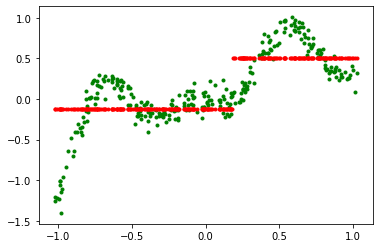

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [7]:
error, linear.weights, linear.bias

(0.09501694173184803, array([[2.79466002]]), array([-0.51417637]))

In [8]:
np.count_nonzero(mask0), np.count_nonzero(mask1)

(121, 179)

In [9]:
'''
This problem needs different type of gradient
* We can move the decision boundary using gaussian based optimization.
* The decision boundary looks at the two sides of it (locally)
* The error is calculated as the resulting shift that 
'''

'\nThis problem needs different type of gradient\n* We can move the decision boundary using gaussian based optimization.\n* The decision boundary looks at the two sides of it (locally)\n* The error is calculated as the resulting shift that \n'

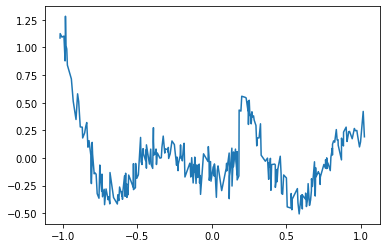

In [10]:
plt.plot(x,dy)

In [11]:
gaussian = tnn.Gaussian()

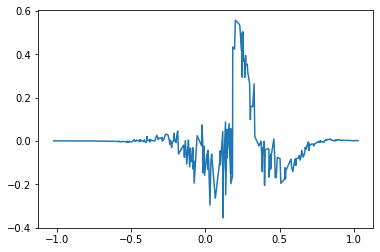

In [12]:
plt.plot(x, gaussian.forward(lout)*dy)

In [13]:
(gaussian.forward(lout)*dy).mean()

0.0010871425259725246

## Sigmoid based,, it has gaussian gradient scaling

In [11]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(sigmoid.backward(dy))#/0.25)
    dx = linear.backward(dy)#/0.25)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1

#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])

    dy = yout - yy
    dx = linear.backward(dy)
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, sigmoid.backward(dy).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.21263926243562917


100 Error =  0.14172289590245538


200 Error =  0.13348171603278142


300 Error =  0.12765862399025513


400 Error =  0.12550216795210298


500 Error =  0.12273019378576815


600 Error =  0.12224416750106873


700 Error =  0.12136088492130331


800 Error =  0.12136088436897344


900 Error =  0.12089250778331442


1000 Error =  0.12030989226676671


1100 Error =  0.12030989047976133


1200 Error =  0.11883942756443512


1300 Error =  0.11883925016547338


1400 Error =  0.11814583224201046


1500 Error =  0.11814582531618768


1600 Error =  0.11836920524078602


1700 Error =  0.11836920428147986


1800 Error =  0.11836920428146158


1900 Error =  0.11836920428146158


2000 Error =  0.11836920428146158


2100 Error =  0.11756836186329099


2200 Error =  0.11756836154797506


2300 Error =  0.11756836154794546


2400 Error =  0.1175683615479455


2500 Error =  0.11756836154794549


2600 Error =  0.1175683615479455


2700 Error =  0.1175683615479455


2800 Er

TclError: invalid command name "pyimage61"

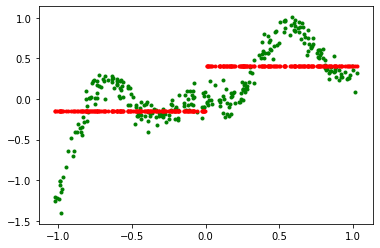

In [23]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [11]:
linear.weights, linear.bias

(array([[6.79878104]]), array([-1.27071566]))

## Greedy best split

In [12]:
splits = np.linspace(-1, 1, num=5000)

In [13]:
def measure_split(split):
    mask = xx<split
    y1 = yy[mask]
    y2 = yy[~mask]
    
    out = np.empty_like(yy)
    out[mask] = y1.mean()
    out[~mask] = y2.mean()
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [14]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

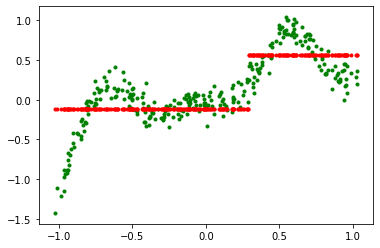

In [15]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')

In [16]:
best_error

0.0802760611912184

## Sigmoid based - Hard and soft combine

In [ ]:
import copy

In [ ]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    
    mask0 = lout>0
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
    lout = dy0*c0*mask0 + dy1*c1*mask1
    dx = linear.backward(lout)
    
#     linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

#     yy_disc = copy.deepcopy(yout)
    
    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))   
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

In [ ]:
dy

### Stochastic sigmoid training

In [ ]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    mask0 = lout>0
    mask1 = ~mask0    
    yout = c0*mask0 + c1*mask1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))
    lout = np.array([np.random.binomial(1, p) for p in lout])
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

In [ ]:
lout